## Rabi Oscillations in an Adatom

This example demonstrates the simulation of a single adatom involving a dipole transition between its energy levels. 

### Set up the StackBuilder

The setup is analogous to the previous tutorials. We need two adatom levels, called "A" and "B" at the same spot. Both orbitals should togehter host a single electron, so we need to explicitly mention a vanishing occupation in one of them.

In [38]:
import granad
import jax.numpy as jnp
import matplotlib.pyplot as plt

sb = granad.StackBuilder()
spot = granad.Spot(position=[0.0, 0.0, 0.0])
sb.add("A", spot)
sb.add("B", spot, occupation=0)

We now include energies and coulomb interactions.

In [39]:
# onsite hopping
sb.set_hopping(granad.SpotCoupling(orbital_id1="A", orbital_id2="A", coupling=0))
sb.set_hopping(granad.SpotCoupling(orbital_id1="A", orbital_id2="B", coupling=1))
sb.set_hopping(granad.SpotCoupling(orbital_id1="B", orbital_id2="B", coupling=2))

# onsite coulomb
sb.set_coulomb(granad.SpotCoupling(orbital_id1="A", orbital_id2="A", coupling=1))
sb.set_coulomb(granad.SpotCoupling(orbital_id1="A", orbital_id2="B", coupling=1))
sb.set_coulomb(granad.SpotCoupling(orbital_id1="B", orbital_id2="B", coupling=1))

Now, we visualize the initial state.

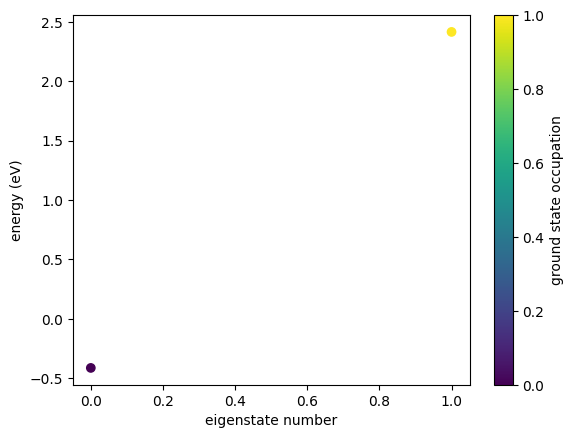

In [40]:
stack = sb.get_stack( from_state = 0, to_state = 1)
granad.show_energies(stack)

Now, we simulate its dynamics. We want to model an external x-polarized field. We want the orbitals to be connected by a dipole transition moment.

In [48]:
amplitudes = [1, 0, 0]
frequency = max(stack.energies) - min(stack.energies)
field_func = granad.electric_field(
    amplitudes, frequency, stack.positions[0, :]
)

# transitions 
transitions = { ("A", "B") : [1., 0, 0.] }
transition_func = granad.dipole_transitions(  transitions, stack )

The time evolution happens as usual, but we must supply the transition function as an additional argument.

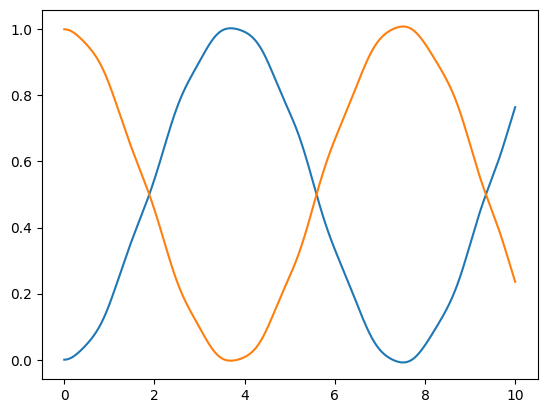

In [49]:
def to_energy_basis( rho ):
    """extract energy occupations from a density matrix
    """
    return jnp.diag(stack.eigenvectors.conj().T @ rho @ stack.eigenvectors)

# propagate in time
time_axis = jnp.linspace(0, 10, 10**4)

new_stack, occupations = granad.evolution(
    stack,
    time_axis,
    field_func,
    transition = transition_func,
    postprocess = to_energy_basis
)

plt.plot( time_axis, occupations.real )